# LEVEL-1

#### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import shap

In [2]:
df = pd.read_csv('Dataset(1).csv')
df2=df.copy()

In [3]:
df.sample(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
330,GP,F,U,GT3,T,2,1.0,other,other,reputation,...,1,5,10.0,12,13.0,14,18.0,2.0,1.0,yes
136,GP,M,U,GT3,T,2,1.0,at_home,other,course,...,1,2,4.0,9,9.0,11,16.0,1.0,1.0,no
87,GP,F,U,GT3,T,4,2.0,other,other,reputation,...,1,1,4.0,15,15.0,15,15.0,3.0,3.0,no
95,GP,F,R,GT3,T,1,1.0,at_home,other,home,...,1,1,4.0,13,13.0,13,15.0,4.0,1.0,no
222,GP,F,U,GT3,T,1,1.0,at_home,other,home,...,1,5,2.0,12,13.0,13,16.0,1.0,4.0,no


### Converting categorical values to numerical ones

In [4]:
df['paid_numeric']=df['paid'].map({'yes': 1, 'no': 0})
df['internet_numeric']=df['internet'].map({'yes': 1, 'no': 0})
df['higher_numeric']=df['higher'].map({'yes': 1, 'no': 0})
df['activities_numeric']=df['activities'].map({'yes': 1, 'no': 0})

## We have to estimate unknown features: Feature_1,Feature_2 and Feature_3

## Analysis for Feature_1

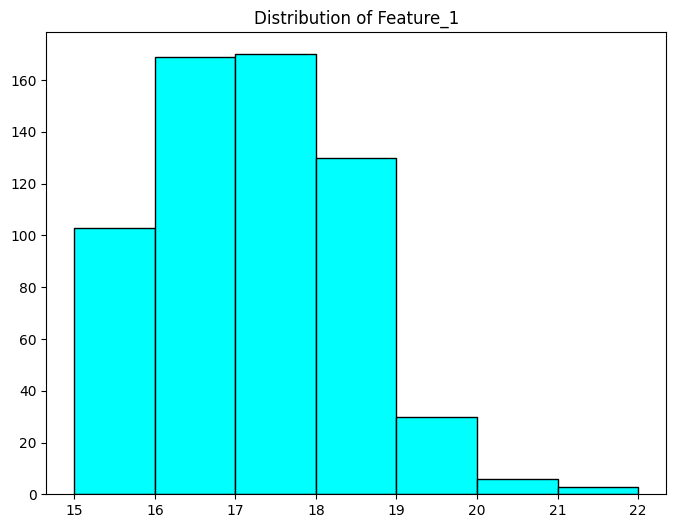

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['Feature_1'].dropna(),color='cyan',bins=7,edgecolor='black')
plt.title('Distribution of Feature_1')
plt.show()

### Using Univarite Analysis we can deduce that the range of feature 1 lies from 15-22 inclusive from both sides and since we have the data of school students, it could possibly be Age of a person or grades of another year/terms

### We will have to do some further analysis to decide

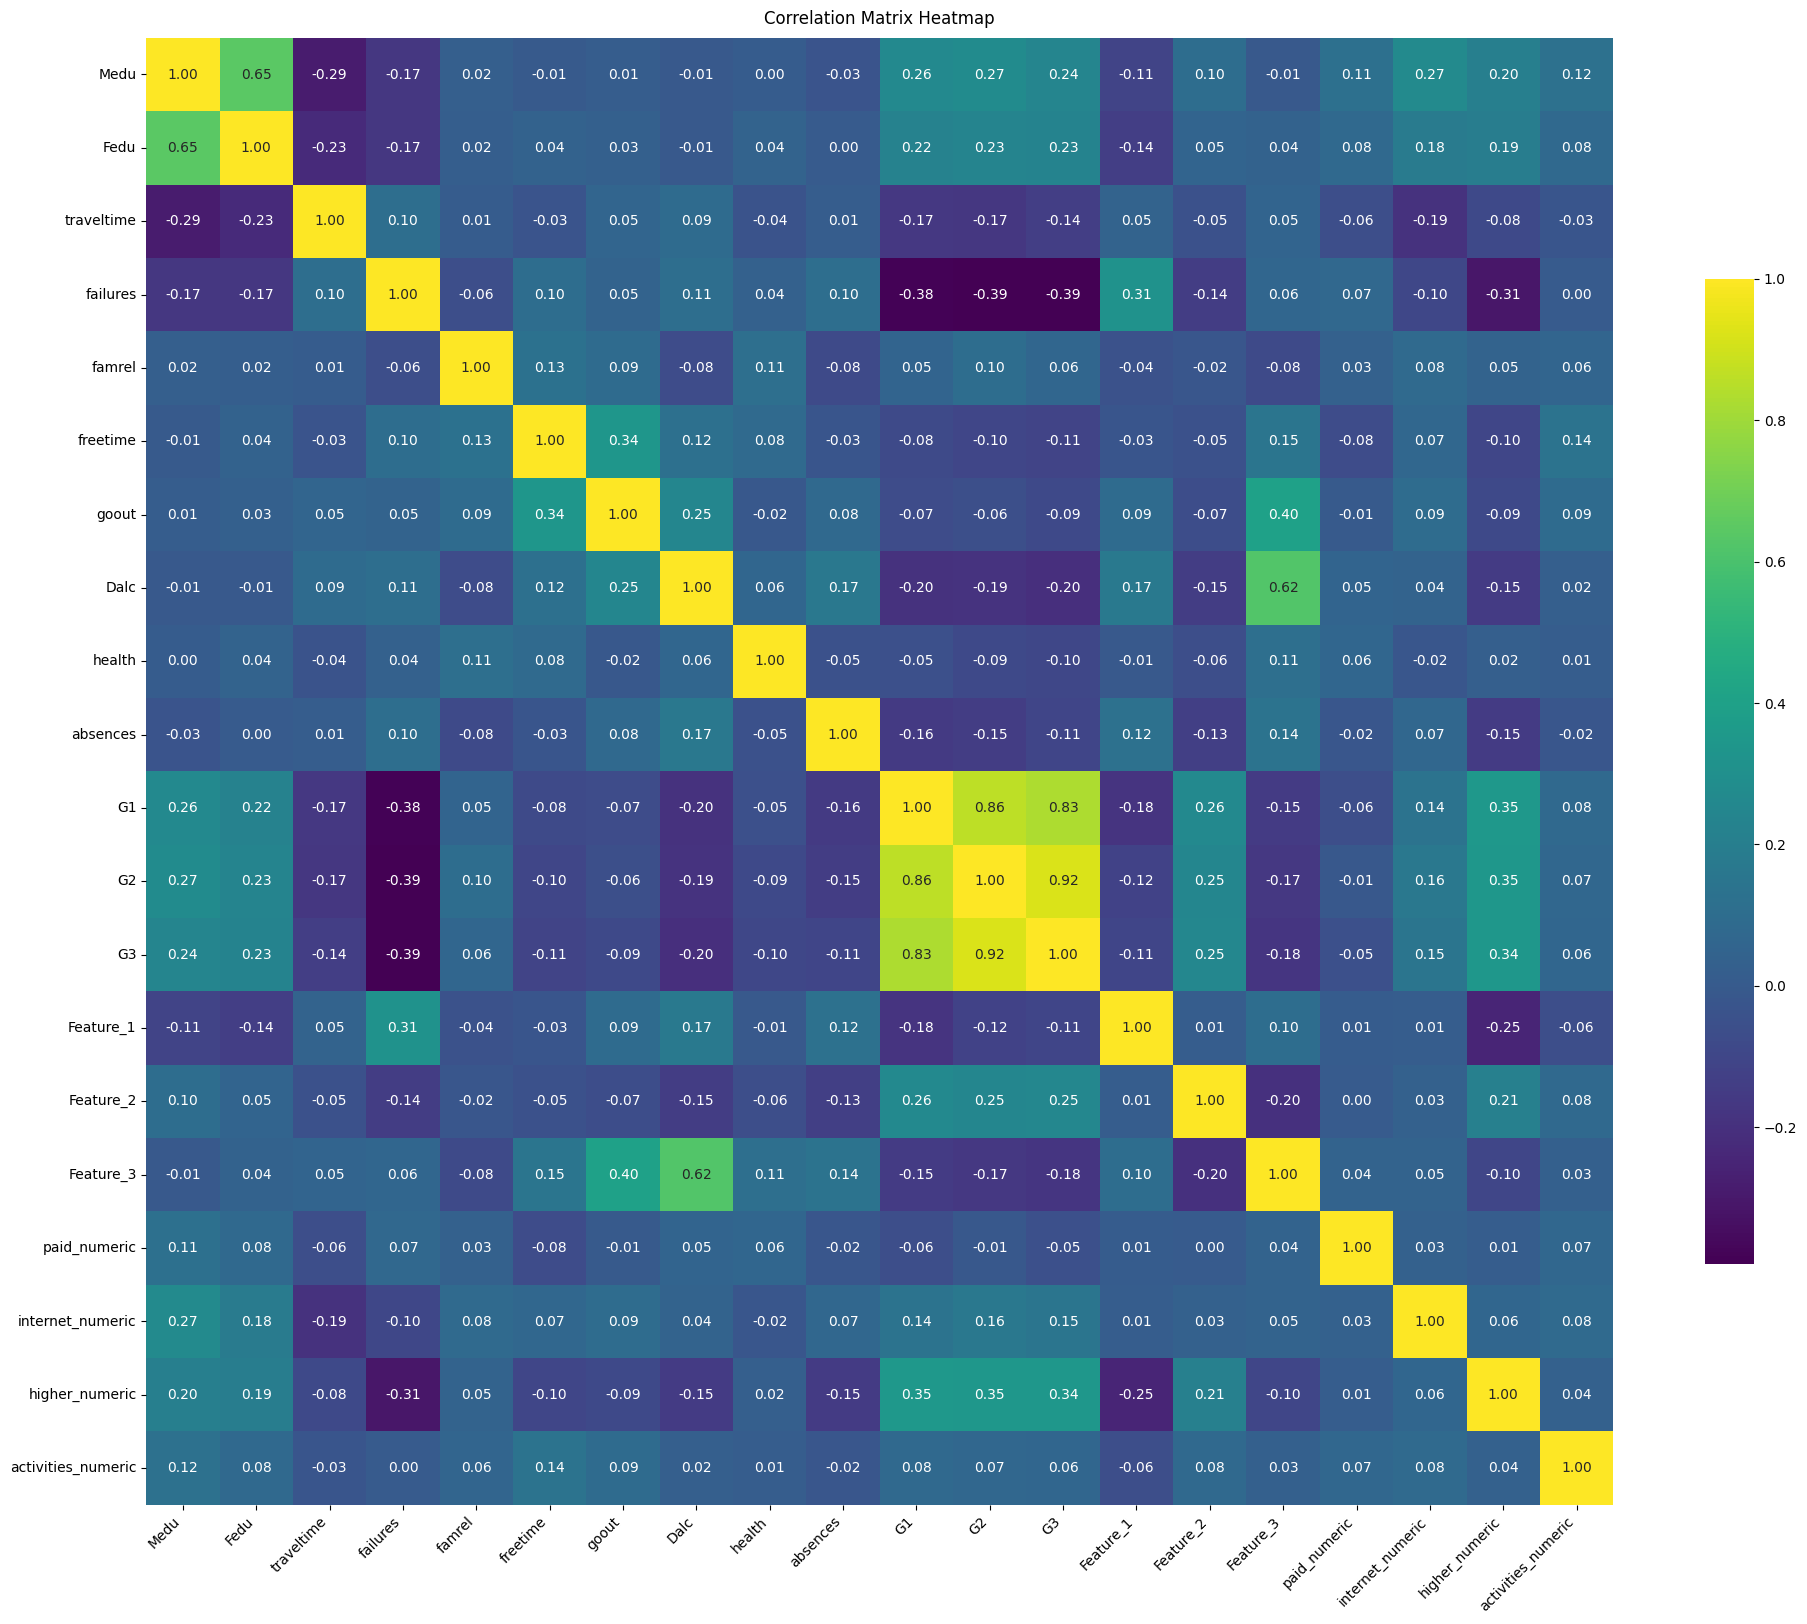

In [6]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix,annot=True,cmap='viridis',fmt='.2f',square=True,cbar=True,cbar_kws={"shrink": 0.5},xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix Heatmap', pad=10)
plt.tight_layout()
plt.show()

### With the use of heat map of co-relation matrix feature_1 tends co-relate with failures, absences and Dalc

### From the above heatmap we can clearly obeserve that Feature_1 and failures have high value emphasizing strong/moderate co-relation. Moreover the G1,G2 and G3 are not at all related to Feature_1 which denies its possibility of being some form of grades hence Feature 1 will be age

## CONCLUSION 1 : FEATURE_1 IS AGE

## Analysis for Feature_2

In [7]:
df['Feature_1'].corr(df['Feature_2'])


np.float64(0.014528422462738657)

### From such a small correlation between Feature 1 and Feature 2 which we obtained using bivariate analysis we can definitely say that Feature_2 will not be a physical feature since it is not much dependent on Feature_1 ,i.e., "AGE"

In [8]:
df['higher_numeric'].corr(df['Feature_2'])


np.float64(0.20685541734454463)

In [9]:
df['G3'].corr(df['Feature_2'])

np.float64(0.24988382521753116)

### These moderately high correlation suggests us that Feature_2 might be academic related like Grades or study time in a day. This is confirmed by strong co-relation present between feature_2 and G1,G2,G3 and higher_numeric on heatmap

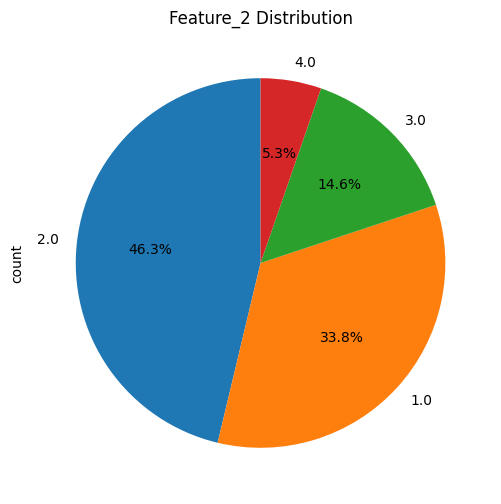

In [10]:
plt.figure(figsize=(8, 6))
df['Feature_2'].dropna().value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Feature_2 Distribution',startangle=90)
plt.show()


### The range of values of Feature_2 solidifies our claim of it being Grades or study time since there are very few students having the value 4 and a most of the students in the mid value i.e., 2 and fewer number of students in the 1 bracket

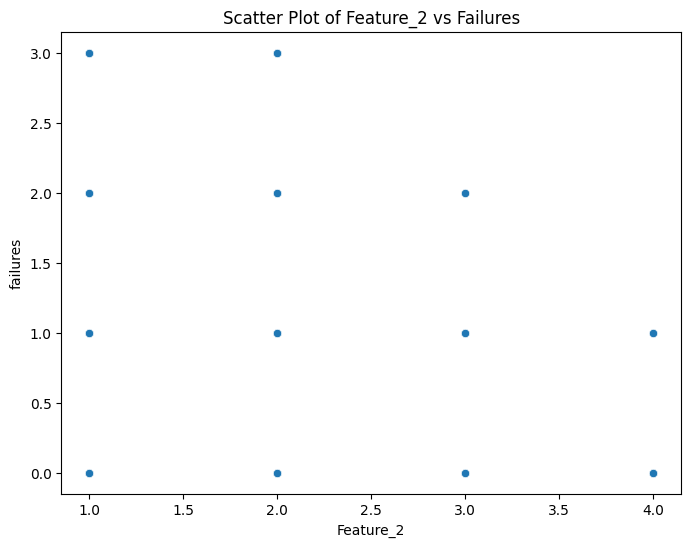

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_2'], y=df['failures'])
plt.title('Scatter Plot of Feature_2 vs Failures')
plt.show()

### The scatter plot also confirms our claim as failures decreases with increase in feature_2, suggesting strongly that this could be study time

In [12]:
df['Feature_2'].corr(df['goout'])


np.float64(-0.06855222667347555)

### We can again see that this relation has very less correlation with going out which now provides enough proofs for our claim

### Hence we can say that Feature_2 is either Study time or Grades but since the scales of G1, G2 AND G3 do not match our claim of feature_2 being grades ,hence Feature_2 will be study time

## CONCLUSION 2 : FEATURE_2 IS STUDY TIME

## Analysis for Feature_3

In [13]:
df['Feature_1'].corr(df['Feature_3'])


np.float64(0.09715953504205523)

### Such a small value of the correlation of Feature_3 with Feature_1 again suggests that Feature_3 will not be any physical feature, as it is very less correlated with Feature_1 i.e., 'AGE'

In [14]:
(df['G1'].corr(df['Feature_3']),df['G2'].corr(df['Feature_3']),df['G3'].corr(df['Feature_3']))

(np.float64(-0.1524869603427029),
 np.float64(-0.1683476563610411),
 np.float64(-0.17572619304096462))

### A negative correlation of Feature_3 tells us that this feature will not be related to academics

In [15]:
df['goout'].corr(df['Feature_3'])


np.float64(0.39781065141509303)

### We have obtained a moderately high value for Feature_3's correlation with going out which suggests that this feature will be somehow related to sports or social activities

In [16]:
df['Dalc'].corr(df['Feature_3'])


np.float64(0.624373150224341)

### We have obtained a pretty high value for Feature_3's correlation with Daily alcohol consumption which totally rules out the possibibilty of Feature_3 being anyhow related to sports and maybe now even related to some health issues as well

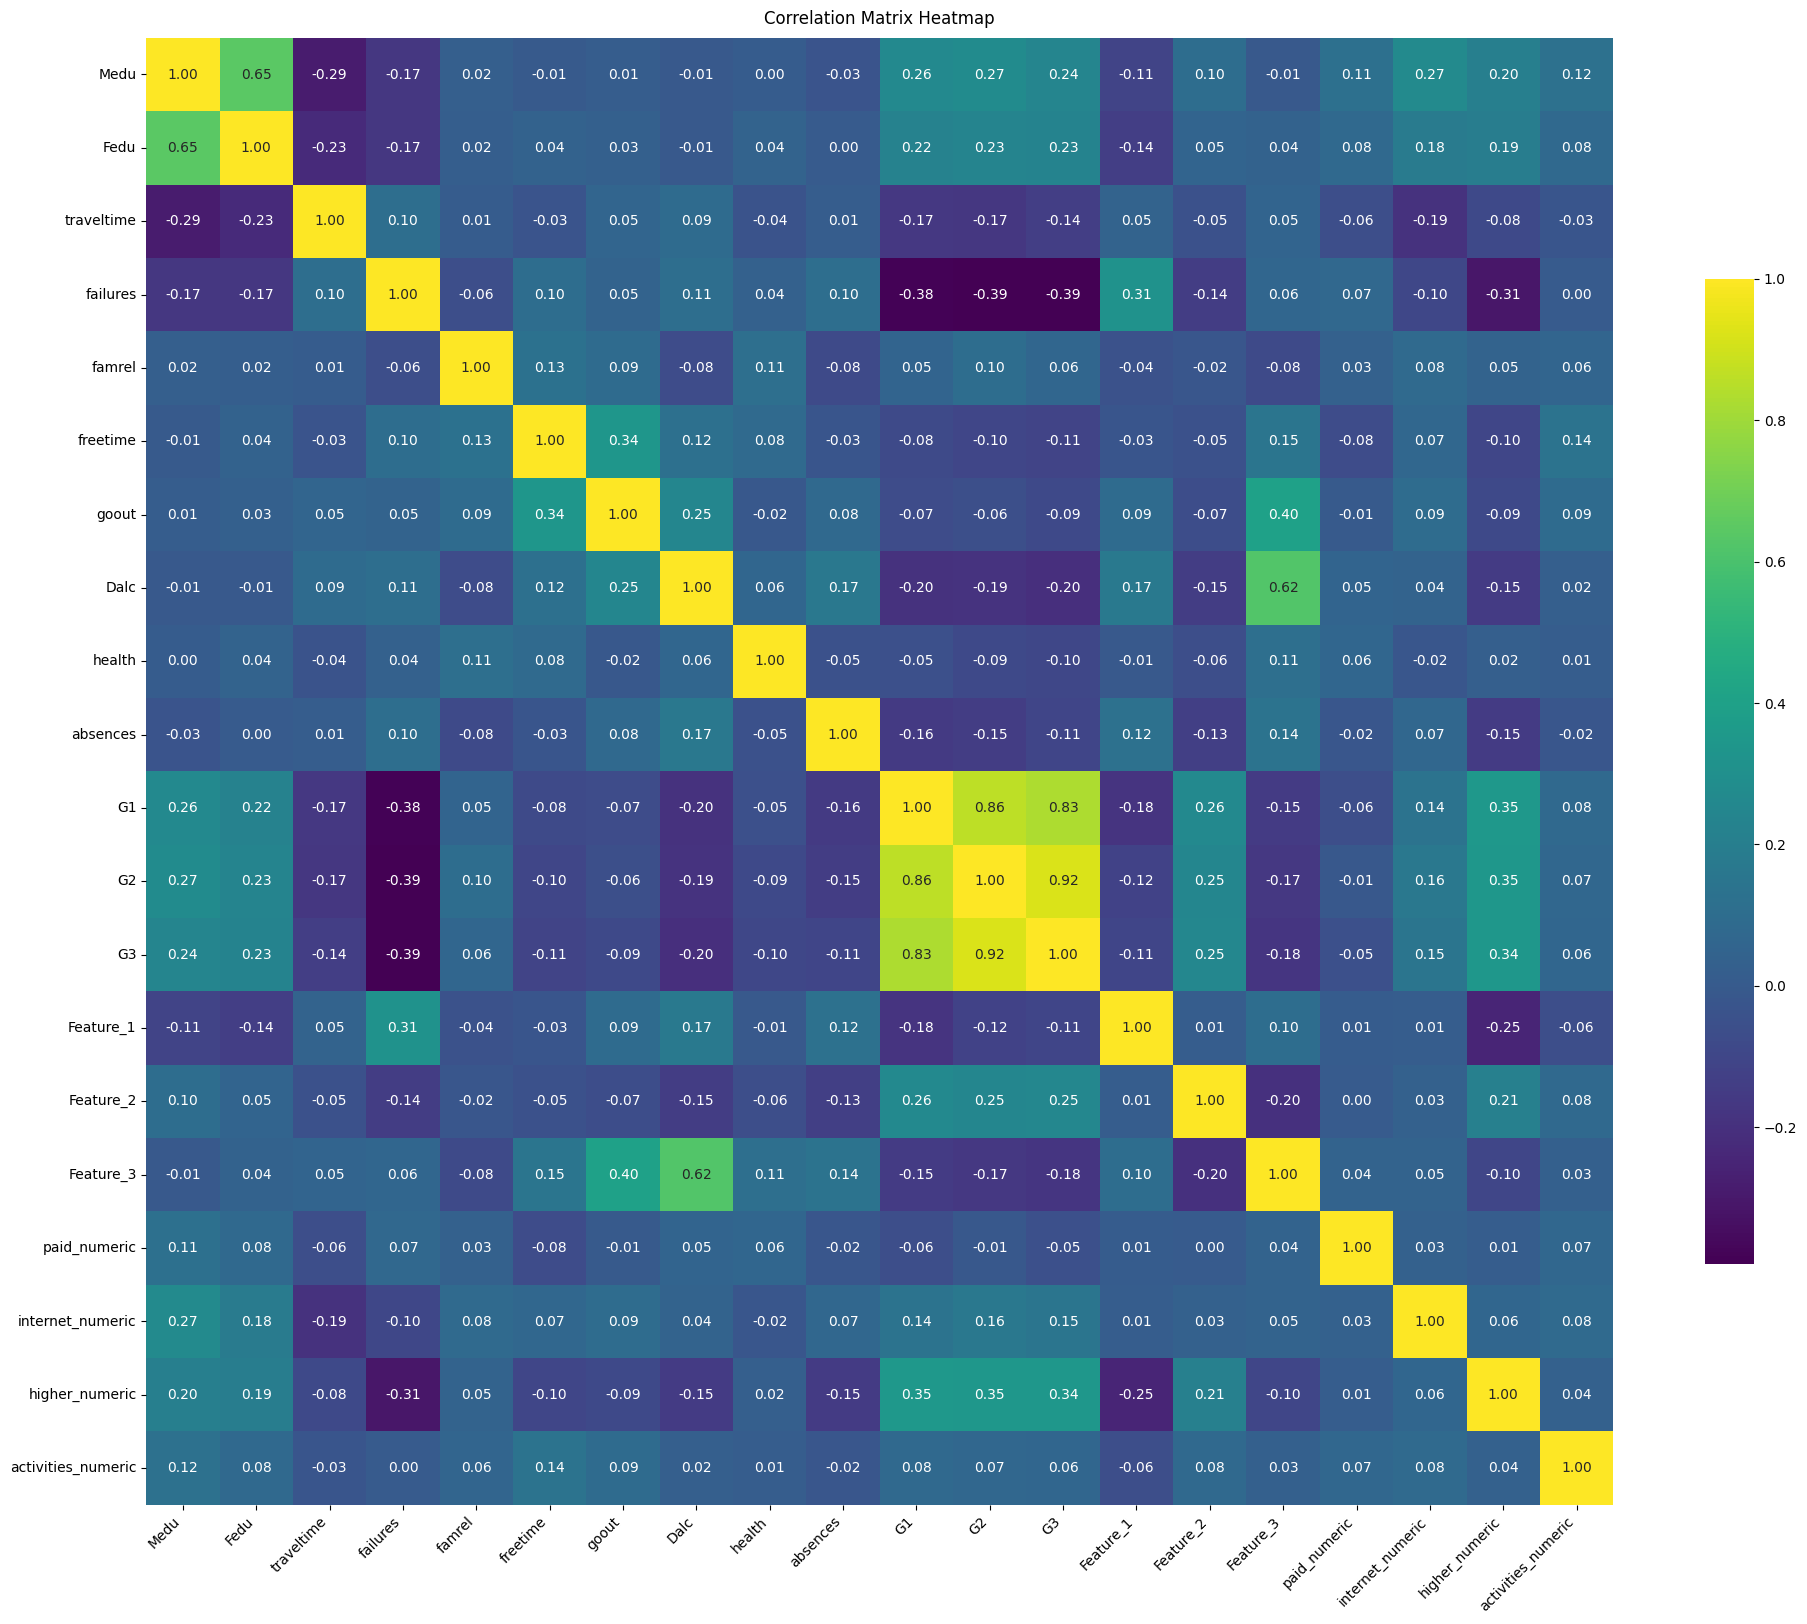

In [17]:
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix,annot=True,cmap='viridis',fmt='.2f',square=True,cbar=True,cbar_kws={"shrink": 0.5},xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix Heatmap', pad=10)
plt.tight_layout()
plt.show()

### A negative co-relation between famrel and higher_numeric and a moderately positive one with absences depict that feature_3 can be partytime

## CONCLUSION 3 : FEATURE_3 IS THE TIME SPENT IN PARTIES WITH FRIENDS

# LEVEL-2

#### How many null values each variable has

In [18]:
df.isnull().sum()

school                 0
sex                    0
address                0
famsize               50
Pstatus                0
Medu                   0
Fedu                  73
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime            73
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
higher                76
internet               0
famrel                 0
freetime              45
goout                  0
Dalc                   0
health                 0
absences              69
G1                     0
G2                    35
G3                     0
Feature_1             38
Feature_2             46
Feature_3             39
romantic               0
paid_numeric           0
internet_numeric       0
higher_numeric        76
activities_numeric     0
dtype: int64

#### Which all variables have null values

In [19]:
[var for var in df.columns if df[var].isnull().sum()>0]

['famsize',
 'Fedu',
 'traveltime',
 'higher',
 'freetime',
 'absences',
 'G2',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'higher_numeric']

In [20]:
null_ratio = df.isnull().mean(axis=1)
dlt_rows = df[null_ratio > 0.5]
dlt_rows

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,G2,G3,Feature_1,Feature_2,Feature_3,romantic,paid_numeric,internet_numeric,higher_numeric,activities_numeric


#### No row with more than 50% data empty is present, hence any row as a whole cannot be deleted

In [21]:
corr_matrix

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,paid_numeric,internet_numeric,higher_numeric,activities_numeric
Medu,1.000000,0.645266,-0.285188,-0.172210,0.024421,-0.006371,0.009536,-0.007018,0.004614,-0.030314,0.260472,0.272536,0.240151,-0.111327,0.097210,-0.009095,0.113973,0.266052,0.204609,0.119354
Fedu,0.645266,1.000000,-0.225239,-0.173993,0.015577,0.037076,0.028104,-0.011505,0.043708,0.000862,0.223507,0.234918,0.227617,-0.138840,0.051633,0.040817,0.077441,0.180960,0.189578,0.079223
traveltime,-0.285188,-0.225239,1.000000,0.102425,0.005246,-0.033022,0.053154,0.086628,-0.036147,0.011891,-0.169075,-0.170496,-0.138247,0.045970,-0.048797,0.052514,-0.064273,-0.193346,-0.083867,-0.028253
failures,-0.172210,-0.173993,0.102425,1.000000,-0.062645,0.097892,0.045078,0.105949,0.035588,0.104639,-0.384210,-0.392113,-0.393316,0.312151,-0.144468,0.063646,0.069416,-0.095330,-0.308991,0.000561
famrel,0.024421,0.015577,0.005246,-0.062645,1.000000,0.126353,0.089707,-0.075767,0.109559,-0.079048,0.048795,0.101754,0.063361,-0.040149,-0.018598,-0.082948,0.031937,0.082214,0.046003,0.057597
freetime,-0.006371,0.037076,-0.033022,0.097892,0.126353,1.000000,0.339153,0.116070,0.084181,-0.025629,-0.080949,-0.100257,-0.110870,-0.026015,-0.045388,0.149797,-0.075027,0.069010,-0.101445,0.137095
goout,0.009536,0.028104,0.053154,0.045078,0.089707,0.339153,1.000000,0.245126,-0.015741,0.077582,-0.074053,-0.061193,-0.087641,0.089430,-0.068552,0.397811,-0.006683,0.092869,-0.086903,0.088582
Dalc,-0.007018,-0.011505,0.086628,0.105949,-0.075767,0.116070,0.245126,1.000000,0.059067,0.165547,-0.195171,-0.187030,-0.204719,0.168583,-0.147515,0.624373,0.051986,0.042811,-0.148509,0.022592
health,0.004614,0.043708,-0.036147,0.035588,0.109559,0.084181,-0.015741,0.059067,1.000000,-0.045782,-0.051647,-0.088448,-0.098851,-0.007759,-0.062246,0.110179,0.063203,-0.022792,0.023616,0.013001
absences,-0.030314,0.000862,0.011891,0.104639,-0.079048,-0.025629,0.077582,0.165547,-0.045782,1.000000,-0.159026,-0.146747,-0.106241,0.119640,-0.133554,0.138778,-0.022323,0.065572,-0.151729,-0.018435


1. From the correlation matrix we can see that 'absences' is not highly corelated with any other column and hence can be filled using mean method
2. Same for feature_1
3. Also 'traveltime' time is corelated with 'school' and 'address' but since they both contain only 2 values ,hence cannot be used to fill 'traveltime' .Therefore it will be filled using mean method
4. Since Medu and Fedu are highly corelated it means we can fill the values with mean using group by method
5. We can do same for 'G2' which is higly corelated with 'G2' and 'G3'
6. Same for 'feature_3' which is corelated with 'Dalc'
7. Same for 'feature_1' which is corelated to failures
8. Since famsize is categorical data and not much corelated to any other field, we will it by mode method
9. Same for higher

## For G2

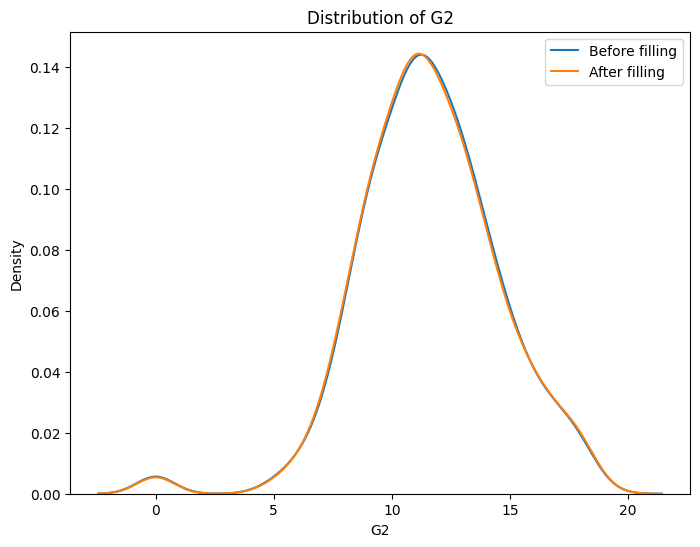

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['G2'],label='Before filling')
df['G2'] = df['G2'].fillna(round(df.groupby('G1')['G2'].transform('mean')))
sns.kdeplot(df['G2'],label='After filling')
plt.title('Distribution of G2')
plt.legend()
plt.show()

### We can clearly see that after filling the missing values there is negligible change in distribution...hence we have filled values correctly

## For Feature_3

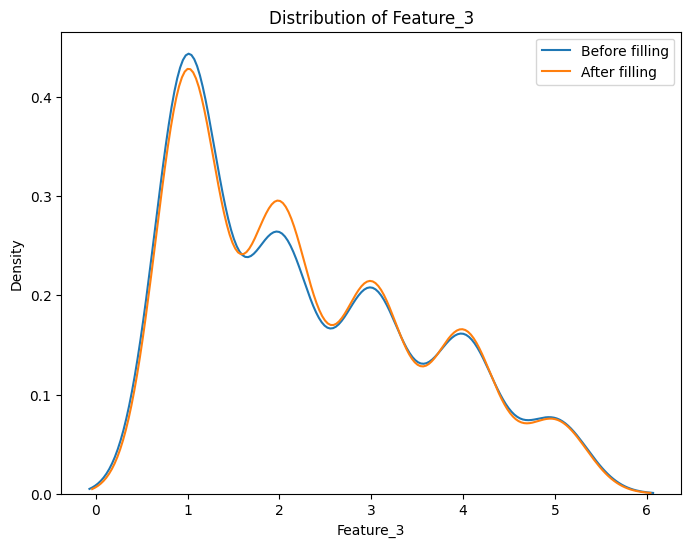

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['Feature_3'],label='Before filling')
df['Feature_3'] = df['Feature_3'].fillna(round(df.groupby('Dalc')['Feature_3'].transform('mean')))
sns.kdeplot(df['Feature_3'],label='After filling')
plt.title('Distribution of Feature_3')
plt.legend()
plt.show()

### Same for 'Feature_3', distribution remains same after filling the missing values

## For Feature_2

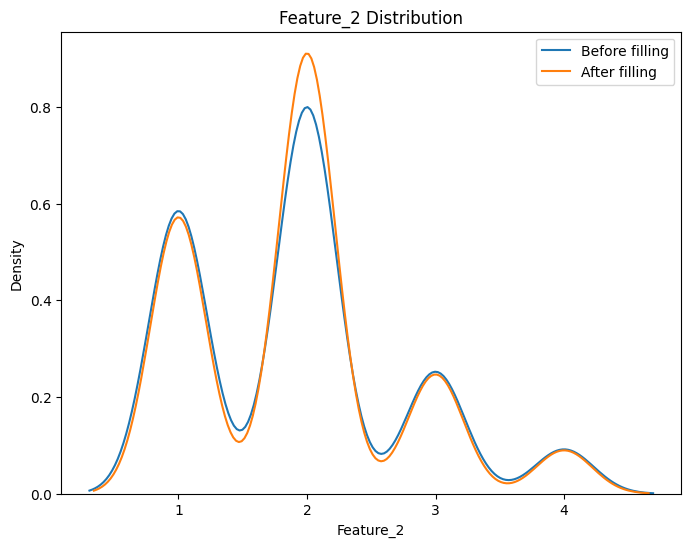

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['Feature_2'],label='Before filling')
df['Feature_2']=df['Feature_2'].fillna(round(df['Feature_2'].mean()))
sns.kdeplot(df['Feature_2'],label='After filling')
plt.legend()
plt.title('Feature_2 Distribution')
plt.show()

### Very small change in distribution

## For Feature_1

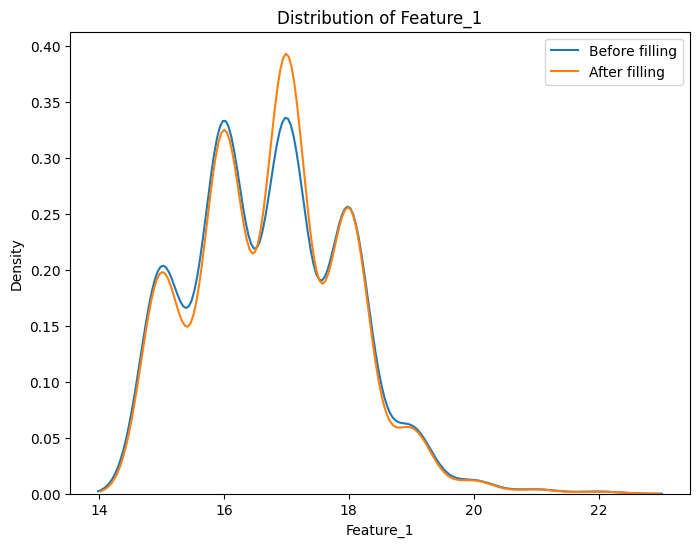

In [25]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['Feature_1'],label='Before filling')
df['Feature_1'] = df['Feature_1'].fillna(round(df.groupby('failures')['Feature_1'].transform('mean')))
sns.kdeplot(df['Feature_1'],label='After filling')
plt.legend()
plt.title("Distribution of Feature_1")
plt.show()

### Slight change in distribution

## For absences

### Before filling missing values for absences using mean we will eliminaate outliers which can skew the mean

### Before removing the outliers

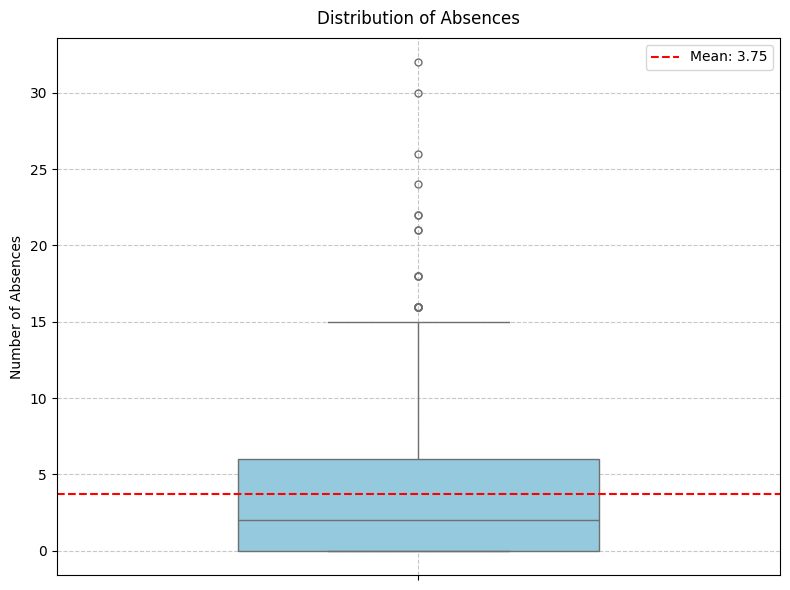

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['absences'], width=0.5, color='skyblue', showfliers=True, fliersize=5)

plt.title('Distribution of Absences', pad=10)
plt.ylabel('Number of Absences')
plt.grid(True, linestyle='--', alpha=0.7)
mean_value = df['absences'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
Q1, Q3 = df['absences'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['absences'] >= Q1 - 1.5 * IQR) & (df['absences'] <= Q3 + 1.5 * IQR)]

### After removing outliers

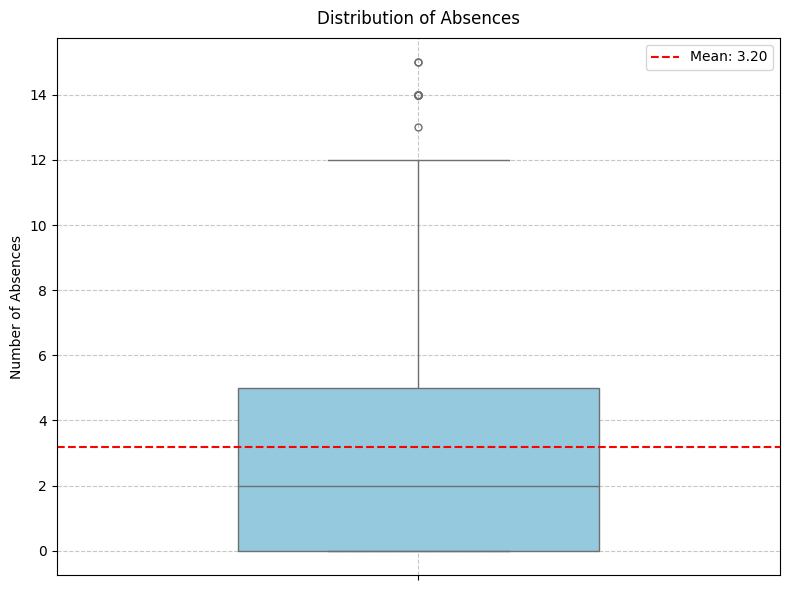

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['absences'], width=0.5, color='skyblue', showfliers=True, fliersize=5)

plt.title('Distribution of Absences', pad=10)
plt.ylabel('Number of Absences')
plt.grid(True, linestyle='--', alpha=0.7)
mean_value = df['absences'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

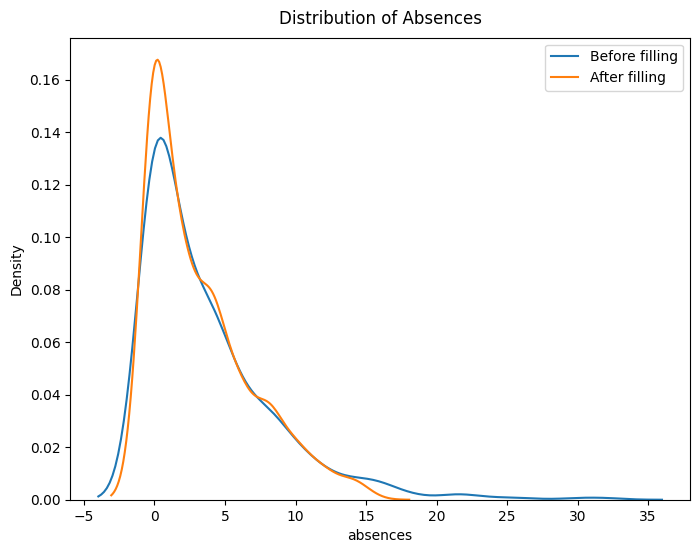

In [29]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['absences'],label='Before filling')
df['absences']=df['absences'].fillna(round(df['absences'].mean()))
sns.kdeplot(df['absences'],label='After filling')
plt.title('Distribution of Absences', pad=10)
plt.legend()
plt.show()

### Not much change in distribution hence correctly filled


## For Fedu

In [30]:
df['Fedu'].corr(df['Medu'])

np.float64(0.6488004788741605)

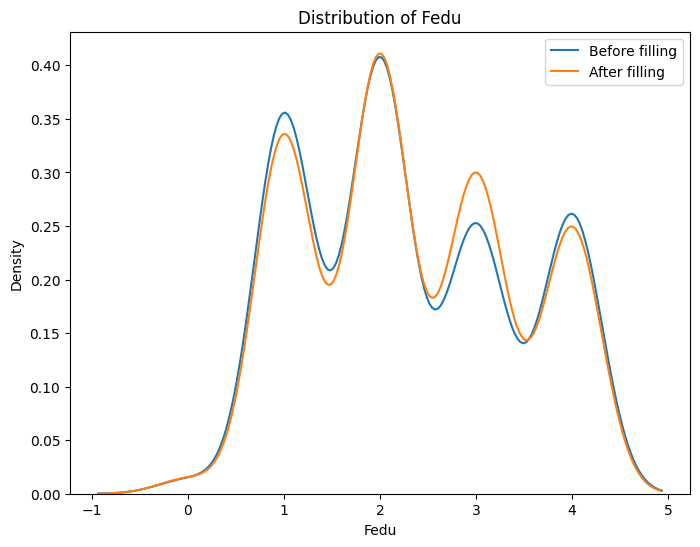

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['Fedu'],label='Before filling')
df['Fedu'] = df['Fedu'].fillna(round(df.groupby('Medu')['Fedu'].transform('mean')))
sns.kdeplot(df['Fedu'],label='After filling')
plt.legend()
plt.title('Distribution of Fedu')
plt.show()

### Slight change in distribution but that will work

## For traveltime

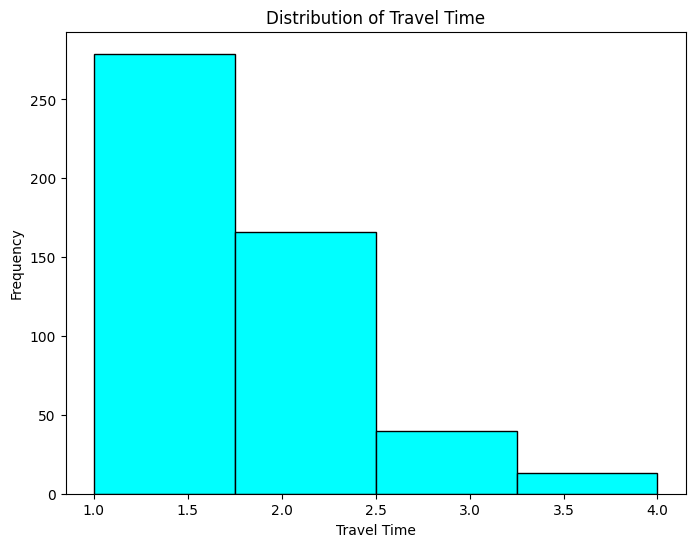

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(df['traveltime'].dropna(),color='cyan',bins=4,edgecolor='black')
plt.title('Distribution of Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Frequency')
plt.show()

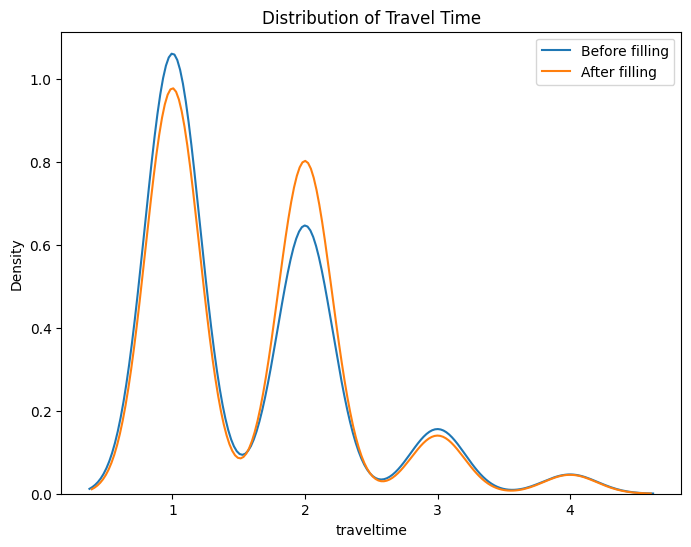

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['traveltime'],label='Before filling')
df['traveltime']=df['traveltime'].fillna(round(df['traveltime'].mean()))
sns.kdeplot(df['traveltime'],label='After filling')
plt.title('Distribution of Travel Time')
plt.legend()
plt.show()

### Slight change in distribution

## For freetime

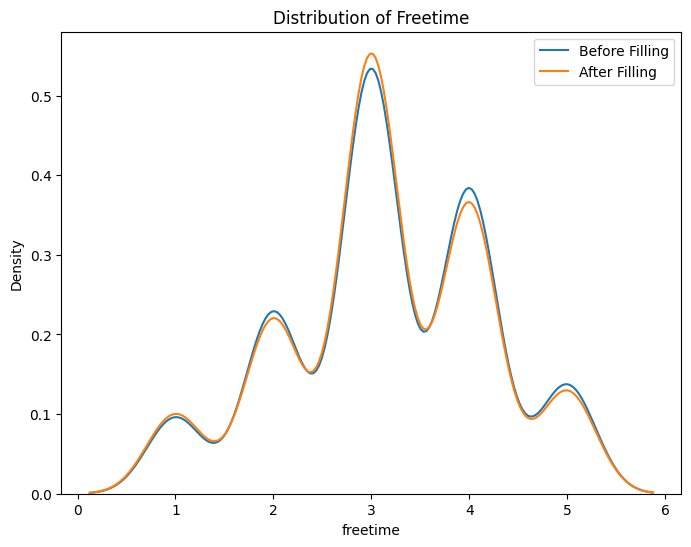

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df2['freetime'],label='Before Filling')
df['freetime'] = df['freetime'].fillna(round(df.groupby('goout')['freetime'].transform('mean')))
sns.kdeplot(df['freetime'],label='After Filling')
plt.legend()
plt.title("Distribution of Freetime")
plt.show()

### Negligible change in distribution

## For famsize

In [35]:
df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])

## For higher

In [36]:
df['higher'] = df['higher'].fillna(
    df.groupby('G1')['higher'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
)

In [37]:
df=df.drop(['higher_numeric','paid_numeric','activities_numeric','internet_numeric'],axis=1)
df.isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64

### All missing values have now been filled

# LEVEL-3

## Some questions based on the dataset after filling the missing values

## 1. Does alcohol affect grades

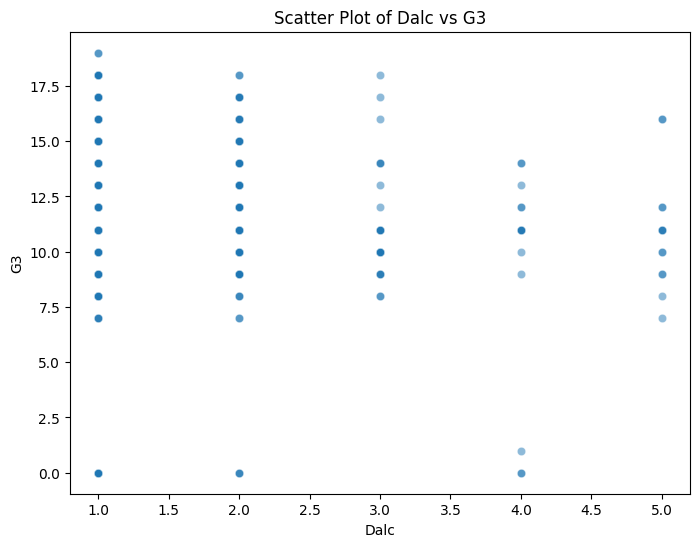

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dalc', y='G3', data=df,alpha=0.5)
plt.title('Scatter Plot of Dalc vs G3')
plt.show()

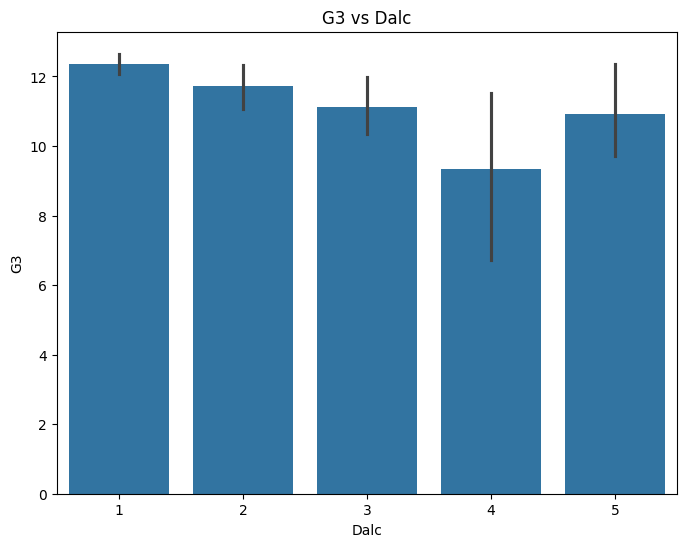

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Dalc', y='G3', data=df)
plt.title('G3 vs Dalc')
plt.show()

### We can clearly see decline in grades with daily alcohol consumption and a large variation with increase in Daily alcohol consumption

## 2. How is relationship affected by extracurricular activities

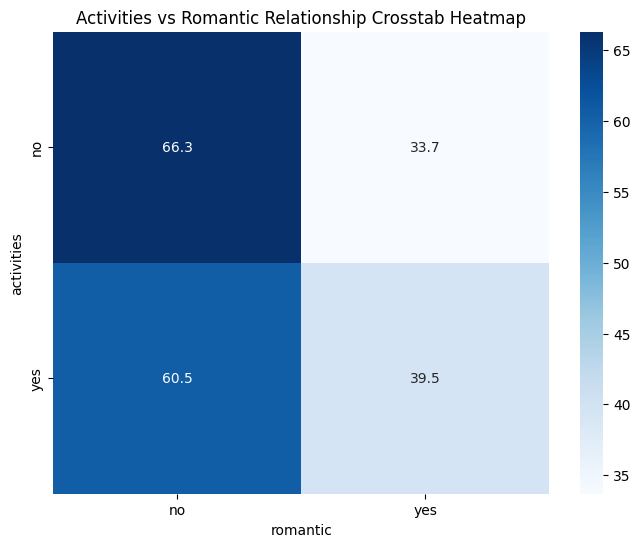

In [40]:
plt.figure(figsize=(8, 6))
ct = pd.crosstab(df['activities'], df['romantic'],normalize='index')* 100
sns.heatmap(ct, annot=True, cmap="Blues", fmt='.1f')
plt.title('Activities vs Romantic Relationship Crosstab Heatmap')
plt.show()

### This draws the conclusion that relationship does not related with extracurricular activites as people with no activites and are not in relationship is almost same as people with activites and are not in relationship same goes with those who are in relationship

## 3. What % of people are in relationship

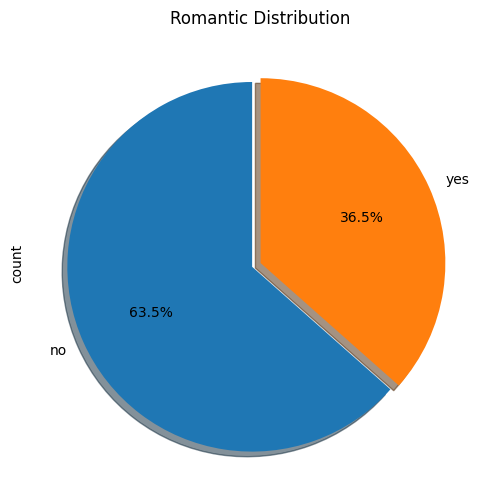

In [41]:
plt.figure(figsize=(8, 6))
df['romantic'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6),explode = [0.05, 0] ,shadow=True,startangle=90,title='Romantic Distribution')
plt.show()

### As we can see very less people are in relationship(36.8%)

## 4. How is relationship affected by Alcohol consumption and party time(feature_3) 

<Figure size 800x600 with 0 Axes>

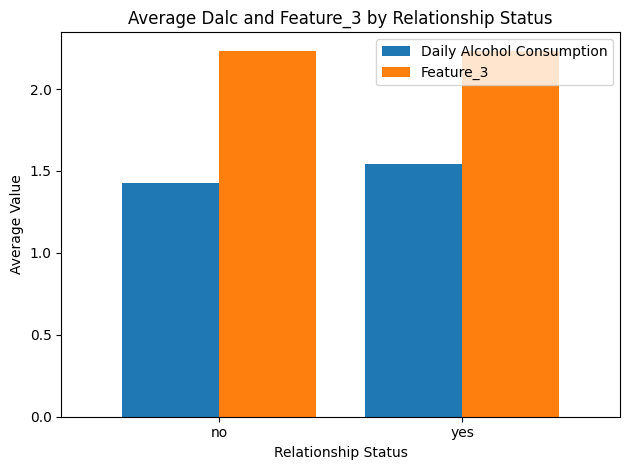

In [42]:
plt.figure(figsize=(8, 6))
avg_values = df.groupby('romantic')[['Dalc', 'Feature_3']].mean()
avg_values.plot(kind='bar', width=0.8)
plt.title('Average Dalc and Feature_3 by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Average Value')
plt.legend(['Daily Alcohol Consumption', 'Feature_3'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Avg value for Feature_3 is same both in case of romantic:yes and romantic:no ,whereas for Dalc the average value is slightly higher for romantic:yes than romantic:no . The difference between avg_values is small/negligible depicting weak/no correlation

<Figure size 800x600 with 0 Axes>

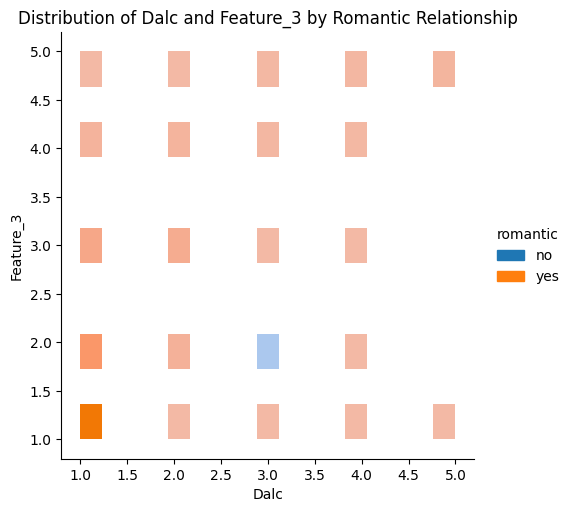

In [43]:
plt.figure(figsize=(8, 6))
sns.displot(data=df, x="Dalc", hue="romantic", y="Feature_3")
plt.title('Distribution of Dalc and Feature_3 by Romantic Relationship')
plt.show()


### From this we can see infer:
1. no such correlation exists with daily alcohol consumption and party time with romantic relationship.
3. But people with less party time(Feature_3) and less daily alcohol consumption(Dalc) seem to be more likely to be in a relationship whereas people with moderate daily acohol consumption(Dalc) and low party time(Feature_3) tend not to be in a relationship

In [44]:
df['Dalc'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.06077615285455271)

In [45]:
df['Feature_3'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.00038670302419115316)

### Our conclusion is correct

## 5. How is relationship dependent on age(Feature_1)

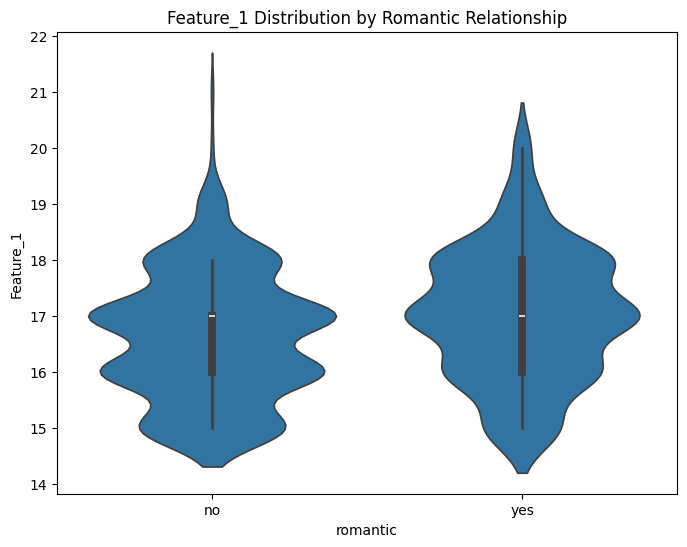

In [46]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='romantic', y='Feature_1', data=df)
plt.title('Feature_1 Distribution by Romantic Relationship')
plt.show()

### The violin plot shows several key insights:
1. The distribution of ages is similar for both relationship statuses (YES/NO)
2. Both groups have similar median ages
3. The NO category has a wider spread at age 16-17, indicating more variability in this age range
4. The YES category shows slightly more density in the upper age range (18-19)
5. Both distributions are roughly symmetric around their medians

# LEVEL-4

In [47]:
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,2.0,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,2.0,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,MS,F,R,GT3,T,4,4.0,teacher,at_home,reputation,...,2,5,4.0,7,9.0,10,18.0,2.0,2.0,yes
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,2.0,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,17.0,1.0,4.0,no


### Changing the categorical values to numerical ones
1. We are using Label Encoder for converting binary categorical data(having only 2 different values). It converts to 1/0. We have used the same method for our target variable('romantic')
2. We are using One Hot Encoder / getdummies() method for our nominal categorical data(having 3/3+ different values). Label Encoder is not used to avoid artificial ordering and we have dropped the original column and the first column after using encoder to avoid multi-collinearity 

In [48]:
binary_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup','famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic','school']
label_encode = LabelEncoder()
for col in binary_cols:
    df[col] = label_encode.fit_transform(df[col])

nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
for col in nominal_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,1,0,0,4,4.0,2.0,0,1,...,False,False,False,False,True,False,False,False,True,False
1,0,0,1,0,1,1,1.0,2.0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0,0,1,1,1,1,1.0,1.0,0,1,...,False,False,True,False,False,False,True,False,True,False
3,0,0,1,0,1,4,2.0,1.0,0,0,...,False,False,False,True,False,True,False,False,True,False
4,0,0,1,0,1,3,3.0,1.0,0,0,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,0,0,0,1,4,4.0,3.0,0,0,...,True,False,False,False,False,False,False,True,True,False
644,1,0,0,0,1,2,3.0,1.0,1,0,...,False,False,True,False,False,False,False,False,True,False
646,1,0,1,0,1,1,1.0,2.0,0,0,...,False,False,True,False,False,False,False,False,True,False
647,1,1,1,1,1,3,1.0,2.0,0,0,...,False,False,False,True,False,False,False,False,True,False


### All categorical data is successfully converted

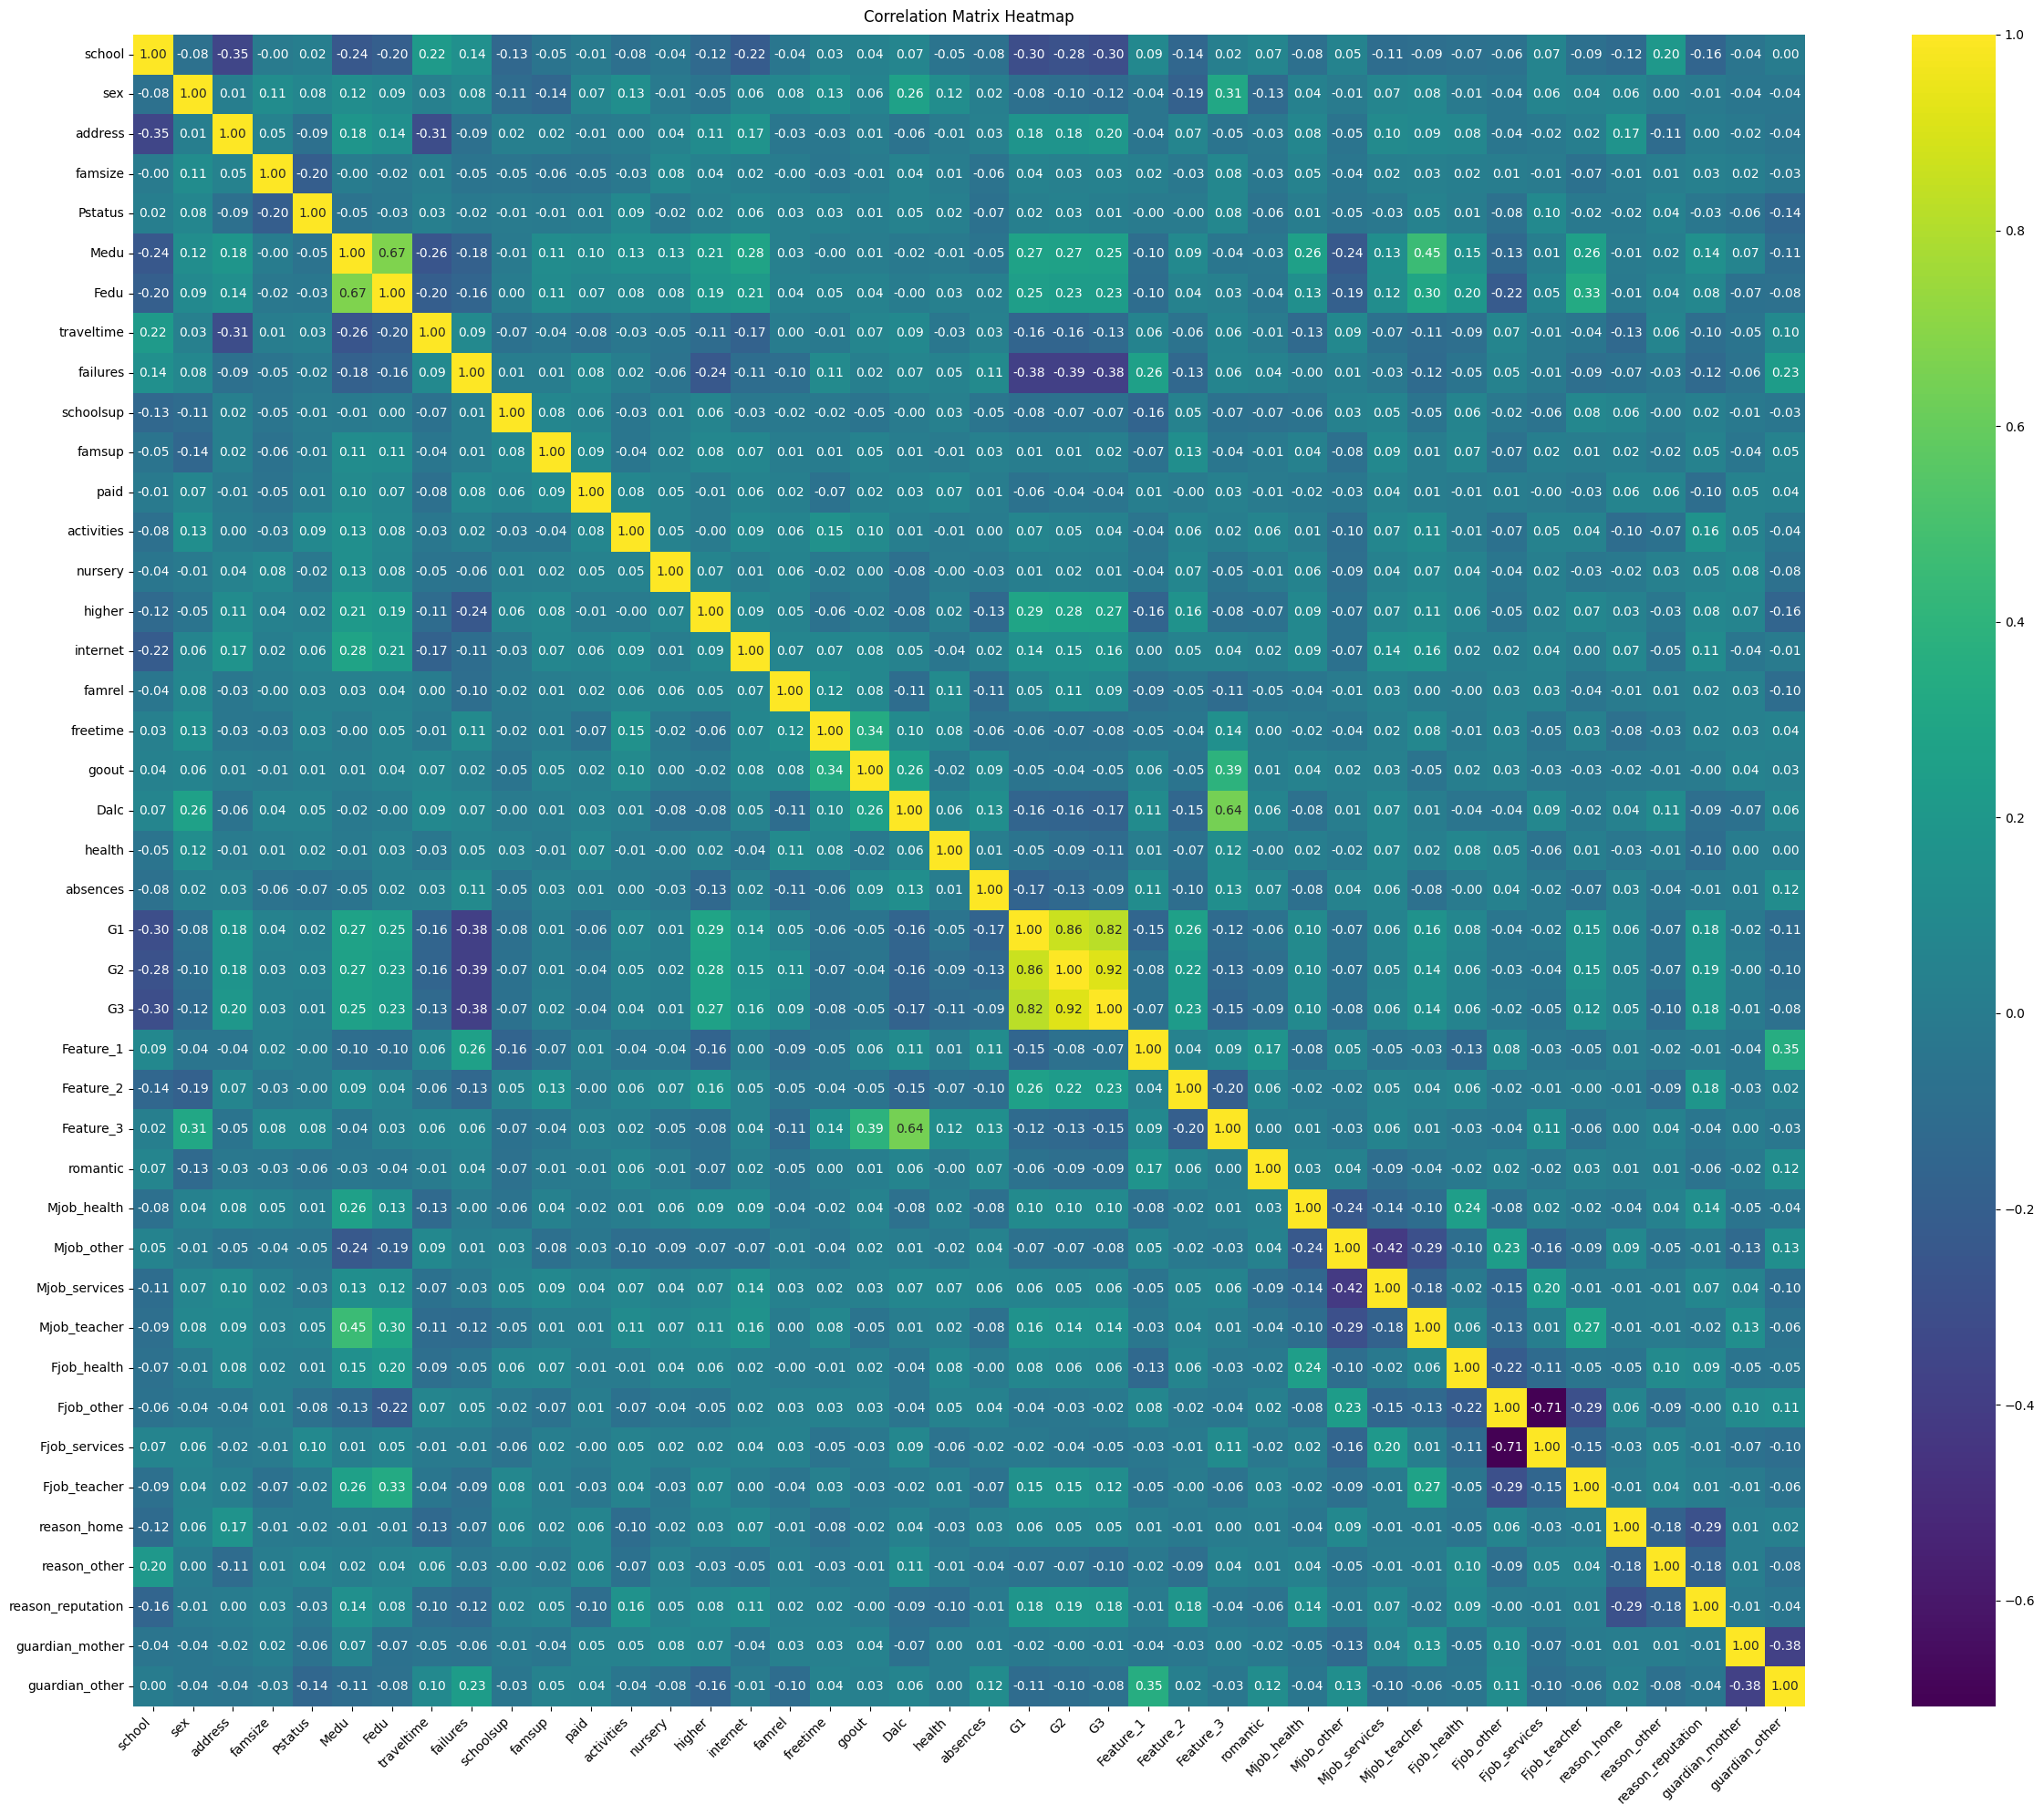

In [49]:
corr_matrix2 = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix2,annot=True,cmap='viridis',fmt='.2f',square=True,cbar=True,
            xticklabels=df.columns,
            yticklabels=df.columns)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix Heatmap', pad=10)
plt.tight_layout()
plt.show()

### Removing duplicate rows if any

In [50]:
print(f"Shape before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape before removing duplicates: (561, 42)
Shape after removing duplicates: (561, 42)


### For model training we are :
1. Using 80-20 data split with stratification to maintain class balance(ensures test and train data sets have same proportion of samples of each class)
2. Using Logistic Regression with L1 regularisation, to automatically eliminate the columns that do not contribute much to prediction
3. Implementing 5-fold stratififed cross-validation,offers reliable estimate rather than being dependent on a single split

In [51]:
X = df.drop('romantic', axis=1)
y = df['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

model = LogisticRegression(max_iter=1000,penalty='l1',C=0.1,solver='liblinear')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Cross-validation scores: [0.57777778 0.63333333 0.65555556 0.64044944 0.64044944]
Average CV score: 0.63 (+/- 0.05)

Test Set Performance:
Accuracy: 65.49%


### Final accuracy is 65.49%

In [52]:
print(confusion_matrix(y_test, y_pred))

[[70  2]
 [37  4]]


In [53]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        72
           1       0.67      0.10      0.17        41

    accuracy                           0.65       113
   macro avg       0.66      0.53      0.48       113
weighted avg       0.66      0.65      0.56       113



### Using SHAP for transparency

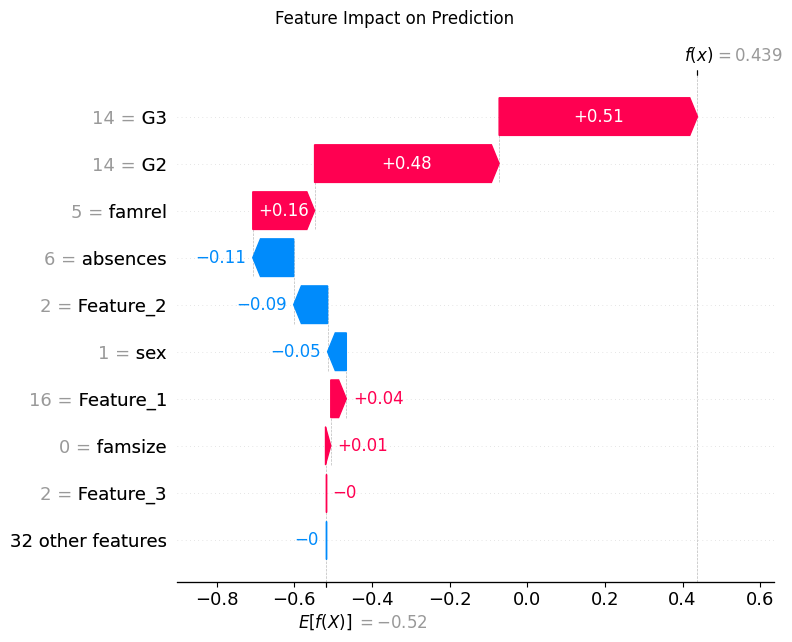

In [54]:
plt.clf()
explainer = shap.LinearExplainer(model, X_train,model_output='probability')
shap_values = explainer.shap_values(X_test)

explanation = shap.Explanation(values=shap_values[10],base_values=explainer.expected_value,data=X_test.iloc[0].values,feature_names=X_test.columns)

shap.waterfall_plot(explanation, max_display=10 , show=False)
plt.suptitle("Feature Impact on Prediction")
plt.tight_layout()
plt.show()

### The bars indicates how much each feature changes the prediction from the average . Red bar indicates changes towards positive class whereas Blue bar indicates changes towards negative class
### For this particular instance better grades,better family dynamics imply high chances of being in a relationship. On the other hand more absences and study time add negative chances to it. This gender in particular has less chances of being in a relationship
### This particular student has 60.83% chance of being in a romantic relationship